# Assignment 3

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps3.pdf

## Problem 1
Formal definition of independence:  
$P(A\cap B)=P(A) \cdot P(B)$  
In terms of conditional probabilities:  
$P(A|B)=P(A)$  

a)   
P(A) = 1/2  
P(B) = 1/2  
P(C) = 1/2

they are pairwise independent:  
P(A|B) = 1/2, P(A|C) = 1/2, P(B|C) = 1/2   
P(B|A) = 1/2, P(C|A) = 1/2, P(C|B) = 1/2  

they are not mutually independent:  
P(C|A,B) = 0 **!=** P(C)=1/2  
P(A,B,C) = 0 **!=** P(A) $\cdot$ P(B) $\cdot$ P(C) = 1/2 $\cdot$ 1/2 $\cdot$ 1/2 = 1/8  

b)

In [1]:
P_A = 0.225 + 0.05 + 0.125 + 0.1
print("P_A", P_A)
P_B = 0.225 + 0.05 + 0.125 + 0.1
print("P_B", P_B)
P_C = 0.175 + 0.125 + 0.1*2
print("P_C", P_C)

P_A 0.5
P_B 0.5
P_C 0.5


In [2]:
P_A_B = P_A*P_B
print("P_A_B", P_A_B)
print("Are A and B pairwise independent?", P_A_B == 0.05 + 0.125) 

P_A_B 0.25
Are A and B pairwise independent? False


In [3]:
P_A_C = P_A*P_C
print("P_A_C", P_A_C)
print("Are A and C pairwise independent?", P_A_C == 0.1 + 0.125) 

P_A_C 0.25
Are A and C pairwise independent? False


In [4]:
P_B_C = P_B*P_C
print("P_B_C", P_B_C)
print("Are B and C pairwise independent?", P_B_C == 0.1 + 0.125)

P_B_C 0.25
Are B and C pairwise independent? False


In [5]:
P_A_B_C = P_A*P_B*P_C
print("P_A_B_C", P_A_B_C)
print("Does equation(1) hold?", P_A_B_C == 0.125)

P_A_B_C 0.125
Does equation(1) hold? True


Equation(1) holds but A,B,C are not mutually independent because they are **not** pairwise independent (each pair is independent)

c)  
A - ‘the family has children of both sexes’  
B - ‘there is at most one girl’    
X - the number of girls ~ Binomial(n, 0.5) 


$P(A) = P(1\leq X\leq n-1) = 1 - (P(X=0) + P(X=n) = 1 - ((1-p)^{n} + p^{n}) = 1 - 2*0.5^{n}$  
$P(B) = P(1\leq X) =  P(X=0) + P(X=1) = (1-p)^{n} + n*p^{1}*(1-p)^{n-1}=0.5^{n} + n*0.5^{n}=(n+1)*0.5^{n}$  
$P(A\cap B) = P(X=1) = n*p^{1}*(1-p)^{n-1} = n*0.5^{n}$

$P(A) \cdot P(B) = P(A\cap B)$  
$(1 - 2*0.5^{n}) \cdot ((n+1)*0.5^{n}) = n*0.5^{n}$  
$(1 - 2*0.5^{n}) \cdot (n+1) = n$

In [6]:
import numpy as np

def check(n):
    return (1-2*0.5**n)*(n+1) - n

for n in range(5):
    check_n = check(n)
    print(f"n={n}, check={check_n}, Is correct {check_n == 0}")

n=0, check=-1.0, Is correct False
n=1, check=-1.0, Is correct False
n=2, check=-0.5, Is correct False
n=3, check=0.0, Is correct True
n=4, check=0.375, Is correct False


Answer: n=3

## Problem 2
a)  


In [7]:
data = np.array([5,0.76,0.32,0.23,0.51,4.98,0.66,5,0.4,0.93,0.41,0.5,4.91,0.28,0.91,0.26,3.94,0.05,5,0.62,4.4,0.59,5,5,5,0.22,4.34,1.13,5,0.7,4.57,0.54,0.43,0.43,0.73,5,1.31,4.97,5,0.92,5,0.73,4.86,0.86,5,0.63,0.26,5,5,5,4.03,4.72,4.91,4.34,4.73,0.74,0.4,0.43,0.75,0.56,0.44,2.97,4.88,4.62,3.8,4.48,0.97,1.05,0.65,0.82,0.58,4.21,5,4.31,0.35,4,0.88,0.86,4.32,5,5,5,0.51,4.8,0.74,0.25,0.28,4.87,0.67,0.81,0.67,0.05,5,0.43,4.73,4.03,3.76,0.68,5,0.43,0.76,1.09,1.26,0.74,4.41,0.66,5,0.17,4.88,0.46,4.59,0.76,0.21,4.78,4.33,4.35,3.98,4.97,0.43,5,3.64,1,3.96,0.48,4.67,0.63,4.86,0.39,4.33,0.31,5,4.93,4.93,3.02,5,4.48,5,5,4.86,5,4.52,3.33,0.42,3.96,0.55,4.72,0.44,5,0.19,5,0.28,5,0.43,0.45,0.58,5,1.01,4.9,5,5,4.37,5,2.7,4.5,3.28,3.56,0.67,5,0.47,0.82,0.72,4.95,0.7,4.76,0.73,4.7,0.15,1.34,4.73,5,5,0.59,0.54,5,4.77,4.79,4.16,0.25,5,0.54,0.57,4.7,5,4.65,0.21,0.86,0.64,5,0.87,0.74,4.64,5,4.73,0.87,0.97,5,0.33,0.08,4.31,0.9,0.2,0.76,5,3.42,5,0.66,5,4.73,3.83,0.58,0.65,4.45,4.56,4.77,4.8,0.51,4.76,0.53,0.43,5,5,5,0.3,0.74,5,0.76,5,0.19,4.3,3.61,0.21,0.35,5,4.74,4.85,0.91,0.84,4.68,4.89,0.57,5,0.18,4.62,4.75,3.33,0.66,0.23,4.55,5,0.83,0.56,0.43,4.98,0.59,5,0.6,4.42,3.79,5,3.11,0.49,4.68,4.54,0.76,5,5,4.23,0.79,5,0.69,0.24,5,0.44,0.81,3.98,0.19,4.09,0.41,4.59,0.56,0.99,1.01,0.43,0.67,4.59,4.74,4.37,0.18,0.35,3.94,0.69,4.44,5,0.65,0.43,0.38,0.81,0.58,4.83,3.91,0.47,5,0.2,5,5,5,5,0.83,1.23,5,4.38,5,3.73,0.4,2.84,5,4.9,4.28,5,0.63,0.72,5,4.34,4.35,4.84,0.75,4.33,0.52,0.12,0.63,0.05,0.86,4.59,0.43,5,0.99,0.29,0.76,4.76,4.6,4.2,0.69,4.89,0.19,5,0.66,3.93,0.85,0.56,0.32,5,5,5,3.91,5,4.84,0.82,0.82,4.58,0.33,0.59,0.45,5,0.18,4.51,0.76,0.14,0.4,0.52,0.83,0.12,4.62,5,5,0.75,0.66,0.35,0.68,0.93,5,4.4,1.02,0.43,3.22,1.02,0.42,0.57,0.32,4.79,1.25,5,4.45,5,5,1.13,0.18,4.74,0.29,5,0.75,0.33,5,0.55,5,4.45,0.36,0.25,0.9,5,4.96,3.08,5,0.19,4.99,0.53,5,0.57,4.99,0.43,5,5,0.43,0.88,0.69,3.79,0.07,0.38,0.71,0.64,0.34,0.82,0.11,0.3,0.9,5,0.45,4.58,3.92,0.58,0.31,5,0.38,1.19,0.45,0.47,0.8,0.66,0.23,0.13,4.62,5,5,0.6,0.78,3.06,0.19,0.76,1.01,5,5,0.23,0.49,1.18,3.89,3.22,0.33,1.44,0.75,0.65,0.24,0.66,0.94,3.95,0.38,0.4,0.57,5,5,0.68,5,5,0.54,0.55,0.12,0.97,0.59,0.14,0.46,4.97,0.53,0.23,0.97,0.01,0.47,0.27,4.64,0.76,1.01,0.68,0.4,0.56,5,0.53,5,5,0.33,1.16,0.57,3.95,4.91,0.48,5,0.21,0.52,5,0.6,5,4.99,5,5,4.57,0.56,0.55,5,3.41,4.52,0.43,4.47,5,4.6,4.97,0.77,4.33,0.92,0.82,4.96,0.36,0.38,3.92,3.65,5,0.74,5,5,4.9,0.47,5,0.39,5,0.35,5,1,4.87,5,0.23,0.32,0.56,4.67,3.9,1.12,0.6,4.91,3.94,5,4.53,3.72,0.85,0.54,5,5,0.52,1.04,5,1.17,0.36,5,1.22,4.23,0.13,4.4,3.13,3.8,0.77,1.05,0.42,5,0.08,5,0.53,0.93,4.65,0.33,0.75,4.96,3.51,4.07,0.67,4.15,0.66,5,0.33,0.83,5,5,0.77,0.95,0.4,0.85,5,0.25,5,4.21,5,0.6,5,0.37,0.03,0.24,4.81,0.04,5,0.53,4.46,2.33,0.32,4.57,0.69,5,0.23,5,0.36,0.17,0.53,5,5,4.51,3.7,0.31,4.93,1.21,0.55,5,3.94,4.83,0.56,5,0.4,0.57,0.57,0.48,4.81,5,0.74,1.03,5,5,4.07,4.52,1.03,0.5,0.42,5,0.34,4.89,5,3.69,3.8,5,5,0.41,0.42,0.3,0.35,5,0.19,4.27,0.19,4.97,0.45,3.93,5,4.83,5,0.42,4,0.3,3.83,0.24,4.69,0.48,4.6,0.51,0.99,1.13,0.27,0.13,4.96,4,0.72,5,0.69,0.39,0.6,4.5,0.13,0.95,0.41,4.38,5,1.02,4.08,5,0.06,0.25,1.02,4.53,3.56,5,4.87,0.76,0.56,0.34,4.29,4.99,4.79,0.71,5,3.99,5,0.45,0.2,4.66,5,0.67,4.59,4.52,0.73,0.52,4.98,0.46,0.39,5,4.68,5,4.25,5,5,5,0.16,4.22,0.23,5,5,0.55,4.45,5,4.81,0.09,0.75,1.07,4.25,4.61,0.06,4.36,5,4.97,0.36,0.25,0.8,0.21,0.5,3.62,4.1,0.8,0.41,0.49,0.55,5,4.18,4.29,4.42,4.76,4.78,1.07,0.36,4.64,0.51,4.26,5,0.63,0.72,1.04,5,4.95,0.55,0.3,5,0.58,5,4.8,4.92,0.09,4.69,0.57,5,5,0.94,0.73,0.24,0.72,0.76,0.68,0.1,0.93,4.73,0.73,3.97,4.89,3.81,0.8,4.71,0.29,0.4,4.01,4.33,0.34,0.84,0.51,0.42,0.73,0.14,4.15,4.82,0.67,0.92,0.14,5,4.85,0.45,3.74,5,4.28,4.3,0.3,0.48,4.53,1.07,4.18,5,4.48,4.66,4.91,0.69,0.54,0.93,5,4.36,0.7,4.97,0.86,0.18,5,4.82,0.22,0.47,0.77,5,5,0.23,4.24,0.52,0.9,5,3.26,4.76,3.69,0.79,5,4.75,5,0.33,5,0.33,0.33,0.44,0.37,0.76,0.18,0.61,5,0.28,3.9,5,4.65,0.49,3.87,0.78,5,5,5,0.41,0.11,0.34,4.4,0.43,5,4.64,0.36,0.71,4.86,1.14,3.39,0.93,0.74,4.29,4,4.97,4.11,1.08,0.45,0.24,0.41,0.55,5,0.85,0.6,5,0.44,0.77,5,0.85,4.17,0.65,3.91,1.02,0.84,0.24,0.57,5,4.75,3.82,0.36,4.5,4.4,5,0.03,0.77,3.49,1.02,0.27,1.14,0.41,5,0.7,0.94,4.48,3.98,0.45,0.76,0.27,5,0.32,5,5,0.21,5,3.99,4.17,0.22,0.9,5,5,5,3.25,1.08,5,0.66,0.8,5,0.31,0.35,5,0.45,0.24,5,5,5,5,0.63,4.94,0.81,5,0.56,5,0.52,5,5,0.44,0.48,0.55,0.11,1.02,0.42,0.78,0.58,1.06,0.31,4.34,0.14,0.54,0.67,0.36,5,4.69,5,0.49,4.7,0.7,0.36,0.3,0.41,0.43,0.78,0.33,5,4.8,4.69,0.52,0.08,0.72,5,4.14,5,0.68,1.03,0.56,0.52,4.96,0.14,4.13,4.26,5,0.06,0.5,4.9,0.36,3.92,0.51,0.53,5,0.58,0.45,4.36,5,3.32,5,5,0.27,3.52,1.04,0.87,0.39,0.56,5,0.3,0.44,0.52,0.02,0.85,0.61,0.64,1.1,0.57,0.98,5,4.89,5,0.66,4.86,5,1,4.84,0.49,5,0.38,0.82,0.73,3.3,0.24,5,1.12,5,5,0.55,0.39,4.97,2.7,5,1.05,3.47,0.52,4.63,0.89,0.39,3.95,0.84,5,4.55,5,4.51,0.68,0.65,0.93,5,5,5,0.48,5,4.92,4.53,3.2,3.22,0.18,0.61,0.43,3.63,0.55,0.43,0.8,0.84,5,0.28,4.57,0.4,5,0.13,5,4.83,0.59,4.44,0.67,5,0.44,0.31,0.66,4.44,4.74,4.57,3.67,0.49,4.35,3.4,0.63,0.57,4.4,0.03,0.6,0.58,4.73,5,5,0.6,4.54,0.66,5,4.48,0.57,4.79,4.32,0.4,0.07,0.53,5,0.85,5,0.66,4.76,0.56,0.72,5,4.15,4.25,5,0.61,4.81,5,1.08,0.31,0.51,4.46,0.31,5,3.88,0.99,0.68,5,3.39,0.09,3.91,5,3.77,3.99,4.74,4.53,0.91,5,4.69,0.42,3.41,0.63,3.57,5,5,0.07,0.62,4.27,3.98,4.61,4.31,0.35,4.96,5,0.41,0.83,5,5,0.7,0.53,5,0.6,4.45,5,4.61,0.27,4.8,4.8,1.06,4.05,0.27,5,4.73,0.56,0.11,5,5,4.73,0.5,5,0.8,0.43,4.3,0.54,5,0.08,0.98,4.19,1.22,3.86,5,0.4,4.2,0.6,0.39,5,0.47,0.21,5,0.36,4.99,0.41,5,0.14,0.3,4.91,0.2,3.73,1.15,5,0.33,3.52,0.58,0.63,0.37,0.46,3.07,4.49,0.2,0.57,0.33,0.4,4.95,0.44,5,3.69,0.66,0.21,4.83,0.19,0.44,3.8,0.9,0.12,0.5,0.48,0.63,0.52,1.03,5,5,5,4.72,0.4,3.7,4.68,5,5,5,4.87,0.55,4.8,1.02,5,0.45,5,4.04,0.67,0.65,0.24,0.15,4.65,0.84,0.15,0.5,0.27,1.35,5,0.97,3.8,0.82,0.56,0.18,5,0.42,5,0.49,0.25,0.92,0.47,0.62,1.25,0.44,0.35,0.2,5,4.66,4.44,0.67,4.94,0.24,0.5,5,5,4.43,5,0.39,5,5,0.8,0.54,0.36,1.31,4.22,0.89,5,5,4.65,0.12,0.46,5,4.41,0.56,0.06,4.36,5,5,0.56,4.47,0.85,0.49,0.29,5,0.22,0.83,3.4,5,0.35,5,3.92,1.03,4.71,0.24,0.1,5,0.35,5,0.25,4.86,0.08,0.33,4.45,0.61,0.84,4.25,0.21,4.88,0.13,0.08,0.22,0.64,0.3,0.4,1.33,0.59,3.16,4.31,0.54,4.5,1.31,4.53,5,0.39,0.4,0.53,0.21,4.2,1.31,0.47,5,4.41,0.47,4.91,0.69,0.41,0.79,0.72,3.89,0.97,3.25,4.77,0.41,4.42,5,0.65,5,0.74,5,0.68,0.56,5,0.68,5,5,4.84,4.37,5,0.36,0.79,4.79,4.74,4.75,0.88,0.71,4.76,3.69,5,5,5,0.61,4.8,0.35,4.38,0.67,0.37,0.44,4.61,0.22,0.89,0.97,0.31,5,5,4.72,0.16,4.76,4.33,5,0.11,0.56,4.89,5,0.68,0.42,1.01,0.49,0.24,3.77,3.79,0.65,0.88,5,5,5,5,0.57,0.99,0.22,0.72,0.47,1.16,0.9,0.28,0.64,0.76,0.58,4.58,4.79,5,4.84,0.45,4.55,0.12,0.57,5,4.62,0.39,0.44,0.64,5,0.08,4.38,3.46,0.61,0.8,5,0.71,5,4.47,4.78,0.38,4.77,0.21,5,5,4.91,4.45,0.79,5,0.24,4.61,0.27,0.57,0.96,0.53,0.86,0.77,5,4.2,0.6,4.14,5,4.24,5,5,4.74,0.75,0.76,0.05,4.27,4.74,0.72,1.06,0.72,4.78,4.1,5,4.96,0.36,5,3.2,4.82,3.86,5,0.58,0.23,0.26,0.3,0.88,4.74,0.4,0.48,4.97,0.19,0.3,5,0.57,4.21,0.56,0.35,0.54,0.49,5,4.97,4.88,0.59,4.89,0.12,5,0.78,4.76,0.45,5,3.93,5,0.6,0.73,5,1.11,0.3,0.96,0.55,0.93,0.76,0.36,5,5,3.88,5,0.34,0.52,0.6,0.72,4,0.56,5,0.38,0.69,5,5,4.03,5,3.29,5,4.56,4.72,0.78,0.78,0.63,4.3,0.25,0.65,3.46,0.63,0.61,5,3.94,0.56,0.81,5,3.44,0.02,5,4.15,0.92,3.8,0.41,0.61,0.48,0.35,3.65,3.32,0.23,0.07,0.69,0.16,0.39,0.06,4.69,0.24,5,0.84,0.64,4.47,4.78,3.55,0.03,5,4.28,0.51,0.37,4.01,5,0.13,0.58,0.6,3.61,0.4,0.34,0.24,0.43,4.16,0.57,0.03,0.48,5,4.12,4.46,5,0.43,5,0.54,0.54,5,5,0.8,4.88,5,4.46,5,0.35,2.77,5,4.01,0.44,0.56,0.07,0.6,5,0.64,0.49,4.21,4.84,3.5,5,0.54,0.35,0.79,0.63,0.66,4.04,5,0.25,5,3.33,0.51,3.29,0.35,0.46,0.8,3.11,0.56,0.55,4.24,0.21,0.44,0.85,4.82,0.77,5,0.87,0.62,4.71,4.2,0.04,5,0.15,0.81,0.77,0.42,0.43,0.58,0.38,0.81,0.2,0.7,1.06,0.65,5,5,0.15,5,0.39,4.93,0.97,5,0.24,1.05,3.82,4.5,0.32,5,5,4.54,0.93,0.74,0.62,0.04,0.29,0.26,0.29,0.6,0.27,0.84,4.46,3.34,4.65,4.75,0.43,5,5,5,0.99,0.84,0.11,5,4.99,4.99,1.03,5,5,5,0.88,5,4.62,0.54,0.53,0.46,5,4.51,4.31,0.52,1.08,1.21,5,0.58,4.46,0.49,0.45,4.48,5,0.5,3.94,0.9,5,4.97,4.63,4.88,3.55,4.86,0.74,5,5,0.36,3.13,5,0.58,0.21,0.77,4.79,4.67,4.84,4.22,0.33,4.07,4.67,5,4.73,0.58,4.7,4.56,0.09,0.61,4.83,4.28,4.29,0.48,0.38,5,0.5,0.64,4.64,0.67,0.34,0.83,3.48,5,0.35,0.23,0.43,0.78,5,4.36,4.96,3.45,5,4.72,0.34,5,0.69,1.22,0.84,5,5,5,0.75,0.48,5,3.98,4.88,3.56,1.08,1.02,0.13,0.42,0.47,0.73,3.25,1.12,5,5,0.31,0.71,4.9,0.34,0.35,0.85,0.85,0.34,3.98,4.34,5,0.33,0.21,5,4.96,4.96,5,4.25,0.69,5,4.09,0.43,0.82,5,4.38,0.52,3.53,0.94,0.49,0.06,4.44,0.69,0.83,0.45,0.69,0.65,0.44,0.67,4,0.53,4.67,4.69,4.65,5,5,0.57,4.14,0.19,0.03,5,3.67,4.39,4.9,0.75,5,5,0.31,0.13,5,5,5,5,5,0.48,4.51,4.11,4.98,0.69,0.77,0.46,0.17,4.72,0.34,0.3,0.16,0.21,0.46,0.54,0.07,5,5,0.12,0.24,1.26,4.58,4.9,0.47,5,0.81,5,0.56,0.4,3.71,3.96,0.57,4.84,4.44,4.52,0.55,4.8,5,5,0.46,4.52,4.5,4.85,0.42,4.38,5,4.51,5,5,0.67,0.8,4.81,4.58,5,5,0.84,0.54,5,0.42,0.11,0.44,0.02,4.48,5,0.15,0.24,4.94,0.14,1.03,5,0.37,4.57,0.72,4.7,0.37,4.76,0.81,0.44,0.56,4.43,0.2,5,5,0.77,0.73,4.85,0.42,0.11,4.64,4.97,4.57,0.56,4.92,0.67,4.41,4,4.8,0.75,5,5,0.62,0.95,5,0.07,0.69,0.42,0.81,0.26,4.99,0.39,0.49,3.84,3.99,0.73,0.59,0.76,0.15,0.3,0.39,0.33,5,4.09,4.42,0.34,0.89,5,0.19,5,0.15,0.99,0.33,0.22,0.59,0.06,0.62,5,0.47,4.8,4.44,4.35,0.51,0.14,0.1,5,0.4,0.64,4.7,4.09,0.56,0.57,0.67,0.32,0.53,3.91,0.5,5,5,5,0.45,0.82,5,0.55,0.97,0.27,0.35,5,1.08,5,0.18,4.57,2.17,0.56,0.76,0.49,5,0.41,4.02,1.08,0.95,5,0.88,0.52,4.59,0.45,0.76,5,0.4,4.08,0.34,0.6,5,0.98,0.4,3.38,0.14,0.5,0.29,5,5,5,5,0.65,5,0.74,5,0.87,5,4.95,0.5,5,0.49,0.7,0.14,4.95,0.55,0.54,0.75,0.23,0.63,0.89,4.77,4.05,5,5,5,0.94,0.6,0.95,5,5,0.23,4.36,0.79,5,0.42,0.51,5,0.49,5,4.46,0.69,0.4,4.7,0.17,0.45,0.4,4.29,0.3,4.23,0.89,0.29,5,4.91,4.86,0.65,4.18,0.16,4.96,5,0.6,0.43,4.56,4.64,3.84,0.69,5,4.65,4.86,5,0.42,5,4.16,5,1.06,0.98,4.04,5,4.62,0.81,5,0.29,4.22,0.67,0.99,0.67,4.91,0.62,4.66,0.59,0.72,0.39,0.4,4.03,0.46,4.59,5,5,0.82,0.53,5,0.83,0.09,5,0.15,4.98,4.98,0.36,0.59,0.65,4.83,0.13,4.2,4.61,0.3,0.75,4.52,5,0.22,0.73,0.91,5,5,0.77,0.57,5,5,0.79,0.37,0.7,3.74,3.99,0.3,0.32,0.46,0.77,4.77,3.98,0.5,0.92,5,4.57,0.02,0.56,0.6,0.13,0.79,4.36,3.42,5,5,5,5,4.74,0.13,5,5,4.58,0.25,0.27,5,1.05,0.05,0.45,5,4.27,5,5,0.89,0.09,5,4.01,0.86,4.74,4.08,0.5,4.11,3.77,4.98,0.63,0.22,0.79,0.79,4.21,0.44,0.25,5,0.56,0.67,0.67,5,0.43,0.39,5,0.77,0.19,0.13,1.32,0.08,4.56,3.74,3.78,3.66,0.63,0.59,5,0.95,3.34,4.73,5,5,0.38,0.73,3.75,0.9,0.25,0.73,0.24,5,0.26,0.13,0.54,0.5,0.17,0.76,4.67,4.54,4.23,4.87,0.09,0.4,3.71,0.41,0.66,0.54,0.64,5,4.94,5,4.57,0.39,0.67,5,4.44,4.47,5,4.59,4.39,0.75,3.71,0.47,5,5,0.34,5,0.52,0.04,3.57,0.73,0.56,0.46,4.68,4.48,4.23,5,0.4,4.09,0.87,5,0.31,5,1,1.12,4.63,0.21,3.85,5,0.34,0.46,3.13,4.66,4.03,1.09,0.85,3.82,5,4.23,0.95,5,0.55,0.35,1.09,5,0.4,0.77,3.72,5,4.99,0.48,0.52,0.42,5,4.56,4.63,0.35,0.17,5,0.08,0.16,4.8,4.84,0.13,0.75,4.28,0.61,4.05,0.25,4.76,5,4.77,4.96,5,5,0.41,0.7,0.63,0.17,4.08,0.5,0.27,0.48,0.46,0.48,0.58,5,4.78,0.32,4.8,0.15,0.05,4.89,4.48,2.17,3.83,4.71,4.82,3.82,0.29,0.09,0.71,4.31,5,0.41,3.63,0.51,1.69,0.6,5,4.43,0.99,0.58,4.3,1.07,5,0.25,0.26,5,0.58,4.18,5,3.9,5,4.29,0.83,5,5,4.83,4.45,4.58,4.43,4.61,4.79,5,0.12,0.81,4.77,0.34,0.93,0.2,5,4.46,4.71,0.01,4.61,0.51,3.81,0.33,0.55,0.1,5,0.5,5,5,0.47,0.45,4.68,4.56,0.44,3.94,4.19,1.39,5,5,0.8,3.4,0.62,5,4.61,0.05,0.34,5,0.88,0.15,0.96,4.24,0.46,3.78,4.73,4.73,3.7,4.19,5,0.4,0.41,0.08,5,0.75,0.76,4.87,0.65,4.68,0.72,0.86,4.39,5,5,0.53,0.36,0.75,4.82,0.3,0.34,4.09,0.32,5,2.94,4.53,0.46,0.65,0.56,0.37,0.36,0.07,0.62,0.07,0.88,0.46,0.16,2.68,5,4.97,0.28,0.55,5,0.33,4.18,5,5,0.06,0.29,0.44,4.46,0.39,4.39,4.96,0.61,0.94,5,0.27,0.3,0.56,0.56,4.44,0.88,3.57,0.43,0.72,0.44,5,3.68,5,0.37,1.1,0.57,0.58,0.47,1.44,0.65,5,4.45,0.47,0.03,0.28,4.56,0.89,4.37,3.34,0.7,5,0.52,0.46,0.54,0.38,0.47,0.13,3.59,0.95,0.71,5,1.03,3.34,4.25,5,0.65,5,5,0.42,5,4.9,3.49,0.69,4.7,3.76,0.49,0.41,0.86,0.3,0.44,0.69,0.37,0.31,5,5,5,4.24,5,0.37,0.42,0.56,4.91,5,0.09,5,3.13,4.47,5,0.55,5,0.76,0.19,4.58,5,4.11,4.03,0.67,4.76,0.58,3.55,0.88,0.45,5,0.09,4.94,4.85,0.39,3.57,0.47,0.54,4.17,0.13,5,5,0.28,5,0.47,5,0.63,4.43,0.37,5,4.72,4.76,0.38,5,1,5,4.82,0.58,4.2,4.99,5,0.34,0.66,0.29,4.98,0.3,0.7,0.09,0.36,4.81,5,4.52,0.36,4.71,0.58,5,5,5,0.76,5,5,0.16,5,0.38,0.37,0.51,4.94,0.48,3.5,4.02,4.64,2.94,4.7,0.76,0.5,0.58,0.63,4.4,0.54,0.55,0.67,5,4.45,5,0.76,5,4.33,0.64,0.49,3.81,4.67,5,0.71,4.23,3.94,0.3,5,5,5,0.37,5,0.45,0.93,0.56,0.52,5,0.27,4.35,5,0.37,5,5,5,4.74,5,4.19,0.21,0.71,3.46,5,0.05,4.22,0.79,0.18,4.91,0.71,3.43,0.99,0.42,0.46,4.6,0.55,0.59,0.71,4.76,0.18,4.37,0.29,5,5,3.66,0.84,5,5,0.57,4.22,5,5,0.49,4.11,4.05,0.55,0.54,0.41,5,0.55,0.6,0.41,3.91,0.35,3.96,0.34,0.58,4.52,3.85,4.03,4.39,0.82,4.66,0.92,0.32,5,3.93,4.72,0.84,0.11,0.83,4.97,0.94,0.45,3.44,5,3.78,5,5,3.75,0.66,0.08,0.38,0.27,0.06,0.4,5,4.38,0.2,4.63,0.39,0.19,5,4.89,0.43,4.77,0.66,5,0.66,4.54,5,0.46,0.5,4.72,4.7,0.65,4.55,0.52,5,0.77,0.48,4.64,0.79,5,0.83,0.26,5,5,0.74,4.51,4.26,4.57,0.63,0.49,4.47,0.81,0.49,0.81,0.45,0.51,0.75,4.55,1.03,0.01,0.44,0.29,0.27,5,0.55,0.27,4.35,4.74,5,5,0.72,4.18,4.39,0.28,0.84,4.04,3.1,5,0.13,5,0.47,5,4.48,0.47,4.78,4.56,0.72,0.74,4.19,0.13,4.16,0.86,0.43,0.65,0.25,5,5,3.96,3.93,4.75,4.87,4.92,0.36,0.41,5,0.48,5,5,0.21,4.08,0.29,5,5,0.89,0.18,5,0.86,4.52,4.13,0.58,4.56,4.11,0.84,4.59,0.51,0.92,4.87,4.34,3.47,4.63,3,0.61,4.96,0.82,4.28,4.92,4.86,0.57,5,4.92,0.79,0.36,0.52,4.95,0.07,4.03,4.82,0.67,5,0.4,0.21,4.03,4.88,3.19,0.48,0.16,0.3,0.37,3.09,0.95,4.84,3.19,0.35,5,4.96,0.1,0.92,4.54,0.37,5,5,0.42,2.81,4.11,5,1.03,4.88,4.55,3.59,4.6,0.58,4.02,4.73,5,0.36,5,3.93,5,1.48,0.59,4.48,0.81,0.3,0.37,4.18,0.54,0.52,0.16,0.45,0.34,4.81,0.19,0.84,0.57,4.99,4.61,0.65,4.41,0.69,4.28,0.5,0.12,4.94,0.55,3.75,0.63,5,0.61,3.96,0.71,0.43,0.25,5,0.56,0.22,0.89,0.92,0.34,0.53,4.56,5,4.24,5,5,4.42,4.86,5,5,0.48,5,5,4.73,0.71,0.08,0.73,3.82,2.56,0.63,0.57,5,0.61,0.31,0.81,0.12,3.81,3.88,0.05,4.83,5,3.44,4.29,5,1.11,0.28,5,3.93,0.18,1,0.59,5,0.4,0.43,4.57,5,4.41,4.97,0.38,4.41,0.64,0.4,0.24,5,0.96,5,0.83,5,0.82,4.61,0.82,0.6,0.11,4.03,4.77,3.72,0.51,4.66,4.8,0.19,4.4,4.67,0.53,0.41,5,0.34,4.63,3.45,5,5,0.34,4.98,0.44,0.59,0.66,5,0.77,5,1.01,4.84,5,5,4.24,4.31,3.98,0.56,1.02,0.07,0.4,5,4.49,5,4.03,0.73,4.76,5,3.04,0.81,5,1.09,0.45,5,4.75,4.81,0.65,0.69,0.71,4.87,0.67,4.95,0.56,0.21,0.47,5,2.88,4.92,2.47,0.39,0.39,5,0.77,4.82,4.74,5,4.61,5,5,3.77,4.57,1.08,0.54,0.22,0.52,4.37,0.74,5,4.01,0.44,0.85,1.08,0.54,0.83,1.01,5,0.69,4.05,0.42,3.93,4.63,3.5,5,5,4.52,5,1.27,5,3.07,4.02,1.07,0.29,0.16,4.59,0.37,1.12,0.06,0.98,0.83,5,4.9,3.47,4.02,0.19,0.85,5,0.78,5,0.51,0.4,0.39,4.87,0.28,4.08,4.31,5,0.14,4.49,0.54,0.12,5,4.6,0.25,4.73,4.42,0.05,3.83,0.39,0.46,0.37,5,5,4.61,0.3,0.29,4.18,0.87,0.9,5,4.5,0.85,0.54,5,0.27,1.06,5,5,0.54,5,0.58,4.85,4.19,4.88,0.66,4.44,0.91,5,0.14,4.32,0.57,0.04,5,2.33,5,5,3.63,0.87,0.58,4,0.14,4.19,0.36,0.74,4.33,5,0.43,4.78,4.69,3.96,0.53,4.57,3.49,4.04,4.08,0.06,0.13,4.07,0.69,0.67,0.55,0.27,0.87,0.79,0.54,0.36,4.56,4.41,0.29,3.52,5,0.24,4.43,0.53,0.62,0.47,3.55,4.8,0.71,4.52,4.47,5,4.27,0.09,4.13,0.91,0.73,4.68,0.82,0.32,5,3.91,0.49,0.22,4.41,0.26,0.25,0.81,0.55,4.53,5,0.49,4.5,4.07,0.67,4.68,5,0.36,0.62,4.86,0.57,0.52,0.47,0.21,0.96,0.65,4.59,4.85,0.36,4.34,0.25,4.65,0.38,1.06,5,5,0.37,5,0.05,5,5,0.92,4.57,0.04,0.53,0.81,5,0.59,5,0.74,0.99,5,4.21,3.52,1.06,4.52,0.59,0.54,5,3.39,4.92,0.07,0.34,4.92,5,4.2,0.3,5,0.4,0.66,3.23,0.44,0.43,5,5,0.68,0.64,5,5,0.35,4.48,3.73,4.39,4.4,0.87,4.98,4.53,0.61,5,4.34,4.77,2.7,4.48,4.96,0.75,0.13,4.82,0.48,0.37,5,4.63,0.22,5,0.24,5,0.23,0.45,0.38,5,0.54,0.91,5,0.35,4.79,0.18,0.4,5,0.71,0.27,5,5,0.65,4.65,5,0.9,0.28,0.62,0.34,5,0.21,5,3.64,0.21,0.54,0.23,0.61,4.49,3.87,3.73,4.36,0.53,0.09,4.31,0.55,0.21,5,4.39,5,0.72,1.16,4.49,4.59,0.69,0.53,0.86,5,4.19,4.46,3.88,0.94,4.53,0.13,4,0.04,3.48,4.49,0.35,3.7,0.78,5,5,0.54,0.3,0.33,0.76,5,0.27,0.82,0.34,0.18,0.18,0.6,0.42,0.2,0.81,0.08,4.75,5,4.23,5,5,5,1.02,4.47,3.74,4.9,0.84,0.6,0.8,0.92,5,0.54,0.59,3.63,5,0.44,4.43,5,4.85,0.36,5,4.57,3.33,0.55,4.63,5,0.62,5,0.51,0.2,4.31,4.09,4.75,0.56,0.37,5,0.2,0.14,4.51,4.37,4.74,0.83,0.61,4.19,0.31,0.72,0.64,0.34,4.05,0.59,0.3,0.45,0.35,4.43,0.32,5,0.51,4.68,4.62,0.52,0.88,4.48,0.74,0.19,4.74,0.42,0.42,4.41,0.84,0.65,0.67,5,4.8,1.19,0.11,4.52,4.3,0.9,4.53,0.82,0.44,0.27,0.66,4.72,0.88,0.46,4.45,5,4.05,0.31,5,3.75,0.72,4.32,4.77,5,4.68,0.33,5,5,0.07,3.54,4.29,5,3.93,0.25,0.68,4.95,5,4.32,0.8,0.28,5,3.89,0.34,4.49,5,5,4.69,4.08,0.31,4.39,5,5,5,0.26,4.23,5,4.57,0.37,0.19,0.27,0.53,5,0.32,5,0.5,0.71,0.9,0.43,0.65,0.23,5,0.65,0.37,4.28,0.78,0.56,0.38,0.47,0.09,0.71,0.44,3.87,1.11,0.77,4.03,4.34,4.53,0.09,4.73,5,4.68,0.37,3.63,3.97,4.64,0.06,5,0.42,4.41,0.48,0.26,5,4.71,0.24,0.23,0.22,5,4.52,4.39,0.46,4.99,4.72,5,4,0.44,0.37,0.64,4.44,3.85,0.94,5,4.76,4.69,0.48,0.55,4.51,0.43,5,4.68,4.15,4.99,4.75,0.98,4.45,0.45,0.74,0.35,3.03,3.99,0.73,0.17,5,3.41,4.79,4.87,3.71,0.55,3.2,0.66,0.36,4.83,5,0.13,4.74,5,4.95,5,1.27,5,5,4.9,5,5,0.26,0.46,4.23,5,4.88,3.83,0.78,4.97,4.6,4.49,4.37,5,5,5,5,0.46,0.24,4.58,0.21,0.64,0.76,0.67,0.59,0.35,4.84,5,0.56,4.24,5,5,0.51,5,0.66,4.28,0.15,0.21,5,5,0.16,0.58,0.26,3.8,2.92,0.99,4.8,0.98,5,5,5,4.2,0.42,0.96,3.33,5,0.79,0.15,0.86,5,0.3,3.57,0.44,0.69,0.32,0.88,0.23,0.13,0.71,0.14,0.83,4.8,4.24,5,0.85,4.09,0.6,4.47,4.57,0.6,4.09,4.49,0.34,0.66,0.16,0.67,4.61,5,4.91,0.41,5,4.53,5,5,5,4.19,4.64,5,0.27,0.57,3.94,5,4.21,0.09,4.76,0.36,5,0.68,3.63,4.92,0.53,4.02,4.81,0.58,4.46,4.14,5,0.78,4.53,0.66,4.73,0.35,4.64,4.05,0.63,0.53,5,5,0.42,5,0.4,0.77,5,0.31,5,0.94,0.17,0.86,0.63,0.74,4.56,5,5,4.95,0.7,5,0.85,0.61,0.96,0.56,0.33,4.88,4.74,4.11,4.63,4.69,4.48,0.83,0.81,0.45,3.68,0.97,5,0.7,5,5,5,4.04,4.41,4.68,0.61,0.76,3.73,0.46,5,0.62,0.69,4.37,0.45,4.04,3.87,0.42,0.3,0.56,0.93,3.78,5,1.11,0.61,4.97,4.37,0.6,5,1.12,0.46,5,5,3.44,0.48,0.53,0.5,0.28,0.35,0.3,5,0.81,5,0.56,2.87,5,5,0.75,0.03,5,5,2.74,3.96,5,5,0.38,1,3.21,4.77,5,0.64,4.37,4.1,5,3.94,4.37,5,4.62,5,4.53,0.56,0.63,0.19,0.65,0.63,0.11,5,0.21,3.57,0.76,0.72,5,4.57,0.51,4.7,0.71,0.51,0.82,4.93,0.73,0.83,4.74,0.88,0.53,4.37,5,4.76,5,4.87,4.25,3.61,4.05,0.27,4.96,5,0.49,4.41,3.66,0.35,4.53,0.68,0.31,4.6,5,5,0.3,0.35,4.14,0.41,5,5,0.52,0.89,4.12,5,0.05,1.06,0.44,5,0.02,0.62,0.73,4.82,0.12,0.43,0.52,0.25,4.73,1.48,0.46,3.33,5,0.19,0.82,3.97,5,0.43,0.5,0.43,0.5,5,4.57,4.88,0.74,5,0.66,0.56,4.9,0.8,5,5,4.79,4.76,4.44,4.97,0.62,5,0.54,0.18,0.75,0.8,0.14,0.17,0.46,5,0.45,4.66,5,0.38,1.21,0.55,0.76,4.89,0.33,5,5,0.66,4.75,0.52,5,5,0.31,0.52,0.48,1.06,0.03,0.42,1.22,0.94,3.8,0.23,0.48,0.82,0.77,3.7,4.49,0.09,0.55,4.66,1.11,5,5,4.55,5,0.02,0.3,4.96,3.43,4.97,0.39,4.16,0.63,0.26,4.14,0.73,5,4.9,0.64,3.64,3.16,0.9,0.67,0.45,1.08,2.58,4.37,0.95,0.34,4.47,4.52,0.11,0.33,4.36,4.76,4.95,5,0.05,5,0.45,5,5,0.77,0.39,0.81,4.36,0.69,3.07,4.15,0.5,3.5,5,5,5,3.79,4.69,0.33,5,5,4.56,0.11,3.93,4.89,4.6,0.9,0.15,5,0.73,4.56,5,0.39,5,5,5,0.51,0.31,4.77,0.65,0.65,0.64,4.74,0.3,0.4,0.36,0.31,0.68,1.19,3.54,0.17,0.32,5,5,0.84,4.56,4.66,0.36,5,3.13,4.81,4.69,0.4,0.17,4.22,0.43,0.38,4.94,0.85,4.23,4.68,0.49,0.2,0.34,5,0.23,3.27,0.7,5,4.68,4.11,5,0.35,5,5,0.34,0.34,4.42,4.97,5,0.68,5,5,0.6,4.98,0.64,5,0.53,3.16,0.75,5,5,5,0.2,0.22,0.92,5,2.93,0.35,0.25,4.49,0.73,1.05,0.76,0.7,0.33,4.25,0.38,5,0.23,0.42,3.78,0.37,4.87,0.54,5,4.53,4.67,0.64,0.28,4.66,4.03,0.68,0.52,5,0.51,0.69,5,3.27,5,0.67,0.48,0.94,4.99,0.29,4.57,0.02,1.08,0.93,0.67,0.72,0.53,0.53,0.66,0.34,0.43,0.04,0.68,0.67,0.53,5,0.57,0.63,4.97,0.22,5,0.47,0.9,0.29,1.06,0.33,5,0.02,0.51,5,0.27,4.26,4.68,0.48,0.07,5,0.68,4.44,5,5,3.93,4.4,0.32,5,0.32,4.75,5,4.87,5,5,0.34,5,0.41,0.36,0.5,3.95,0.22,4.91,4.75,4.46,5,0.72,0.77,0.07,3.6,4.06,0.94,3.94,3.84,4.81,3.99,3.48,4.89,0.35,4.95,0.69,5,0.24,4.11,4.72,0.57,0.67,4.1,0.41,0.02,3.24,5,0.6,5,5,4.02,4.33,0.54,0.37,4.67,5,4.92,5,3.92,0.7,5,4.25,1.48,5,5,4,4.22,0.78,0.68,0.64,0.84,5,0.84,4.06,3.91,0.46,4.22,0.75,0.48,5,1.24,5,0.33,0.02,0.31,5,5,0.73,3.97,0.68,0.39,5,4.13,0.66,5,0.32,0.54,0.73,5,4.13,1.2,0.62,4.89,0.21,5,4.16,5,0.21,4.88,0.77,0.48,0.74,5,5,0.71,5,4.44,0.65,5,5,4.13,0.12,3.83,0.13,4.13,0.31,0.73,4.51,0.42,0.67,4.15,0.51,0.56,4.86,4.72,0.5,4.88,5,4.95,4.24,0.09,4.36,3.51,0.7,5,4.85,0.35,0.43,4.2,0.39,4.75,4.36,0.68,4.23,0.39,0.34,5,4.33,4.18,0.22,5,3.75,3.73,0.29,0.7,0.06,5,5,0.63,4.2,0.57,0.51,0.5,4.55,5,5,1.37,4.87,0.36,5,5,0.15,4.77,0.32,1.09,0.45,0.54,0.56,4.92,0.58,1.04,4.58,0.34,4.93,3.1,0.5,0.61,0.11,0.27,5,5,1.02,0.42,4.89,5,0.29,0.93,4.99,0.5,5,4.43,4.61,5,0.58,0.79,0.27,0.78,4.47,0.89,0.55,0.26,4.32,0.24,0.55,5,1.13,5,0.2,0.62,3.85,4.78,4.15,4.97,3.83,0.81,4.06,0.15,4.17,0.3,0.16,4.12,5,4.49,0.45,5,5,4.39,0.43,3.78,0.6,4.97,4.38,0.1,5,0.12,0.96,0.38,3.51,5,4.42,4.31,0.87,0.85,0.96,0.2,3.63,1.03,4.04,3.53,4.85,4.45,0.36,0.45,0.78,0.03,1.21,4.56,0.66,0.77,3.81,5,4.93,0.61,4.67,0.57,4.83,0.38,3.79,5,0.27,0.42,3.92,4.14,5,0.75,0.72,0.22,5,0.88,1.11,4.46,5,5,0.09,5,3.95,4.72,0.59,0.32,0.41,0.74,5,5,0.79,0.2,5,3.43,0.75,0.51,0.47,4.79,0.53,0.11,0.04,0.3,5,4.33,4.76,4.72,4.86,5,4.34,4.95,5,0.35,4.38,0.65,0.73,4.93,0.31,0.58,0.5,0.55,4.39,4.53,1.14,0.81,5,4.65,4.25,0.52,0.39,0.9,0.89,5,1.07,4.35,5,0.02,4.38,4.82,4.31,0.6,0.78,0.66,0.48,4.93,0.49,4.31,5,4.03,3.47,0.27,0.87,4.69,5,0.48,4.98,4.88,4.84,4.83,0.35,1.06,5,0.17,4.81,0.1,5,5,0.96,0.39,0.46,0.3,5,3.1,4.59,5,3.91,0.93,0.09,0.95,0.71,4.61,0.11,4.06,0.65,0.87,0.84,0.27,5,0.29,3.69,0.73,0.51,4.81,4.94,0.75,4.56,0.83,0.46,4.82,4.78,0.17,5,3.84,4.72,0.61,4.7,5,4.43,0.65,0.75,0.17,5,4.1,0.87,4.95,0.97,0.14,0.57,4.2,4.66,5,3.98,4.28,0.43,0.84,4.16,4.86,0.37,5,0.4,0.51,4.35,0.38,0.39,0.76,0.45,0.49,5,3.98,4.29,5,3.7,5,3.65,4.06,0.32,0.67,4.15,5,4.54,0.77,5,0.52,1.12,5,0.77,4.93,4.42,5,0.45,4.86,0.71,4.23,4.92,0.19,0.26,0.75,0.31,3.48,4.69,4.34,0.55,0.61,0.71,0.36,0.77,0.66,0.63,5,0.42,0.28,0.45,1.2])

In [8]:
data.mean()

2.554528

In [9]:
data.std()

2.0738729317911453

In [10]:
(((data - data.mean())**2).sum()/len(data))**0.5

2.0738729317911453

b)

In [11]:
import matplotlib.pyplot as plt

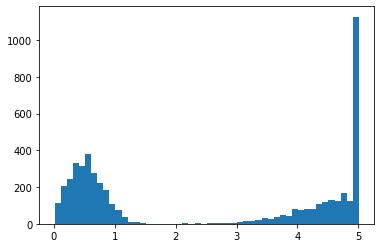

In [12]:
binwidth = 0.1
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth));

c)  
1. There is a signifiacant amount of deaths during the first year. 
2. Some rising death occurences can be observed after 3-5 years. 
3. Significant amount of people survives treatment followed by 5 year time.

d) 
1. Check if there is possible to lower the amount of deaths in the first year. Is this lethality rate related to cancer progress? 
2. Check proportion of natutal deaths 3-5 year.  
3. Is the number of surviviors satysfying for us?

## Problem 3
a)  


In [13]:
import pandas as pd

In [14]:
X = np.array([1,2,3,4])
Y = np.array([1,2,3,4,5,6])

In [15]:
Z = [[(y+x)/2 for x in X] for y in Y]
Z_flat = np.array([zf for z in Z for zf in z])
index = [f"Y={y}" for y in Y]
columns = [f"X={x}" for x in X]

In [16]:
print("Z=(X+Y)/2")
pd.DataFrame(data=Z, index=index, columns=columns)

Z=(X+Y)/2


,X=1,X=2,X=3,X=4
Y=1,1.0,1.5,2.0,2.5
Y=2,1.5,2.0,2.5,3.0
Y=3,2.0,2.5,3.0,3.5
Y=4,2.5,3.0,3.5,4.0
Y=5,3.0,3.5,4.0,4.5
Y=6,3.5,4.0,4.5,5.0


In [17]:
for variable, name in zip([X,Y,Z_flat], "XYZ"):
    print(f"{name} std: {variable.std()}")

X std: 1.118033988749895
Y std: 1.707825127659933
Z std: 1.0206207261596576


check using the equation  
$Var(Z) = Var((X+Y)/2) = (1/2)^{2}(Var(X) + Var(Y))$

In [18]:
Var_Z = 0.5**2 * (1.118033988749895**2 + 1.707825127659933**2)
std_z = Var_Z**0.5
std_z

1.0206207261596576

b)

In [19]:
unique, counts = np.unique(Z_flat, return_counts=True)
pmf = counts/sum(counts)

Text(0, 0.5, 'probablilty')

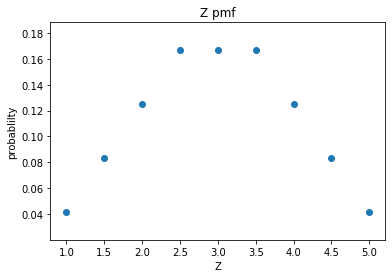

In [20]:
plt.scatter(unique, pmf)
plt.title("Z pmf")
plt.xlabel("Z")
plt.ylabel("probablilty")

Text(0, 0.5, 'probablilty')

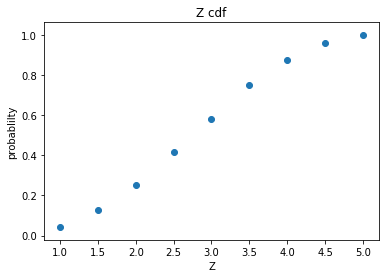

In [21]:
plt.scatter(unique, np.cumsum(pmf))
plt.title("Z cdf")
plt.xlabel("Z")
plt.ylabel("probablilty")

c)

In [22]:
Z_game = [[2*x if x>y else -1 for x in X ] for y in Y]
Z_game_flat = np.array([zf for z in Z_game for zf in z])
print("Z=X>Y")
pd.DataFrame(data=Z_game, index=index, columns=columns)

Z=X>Y


,X=1,X=2,X=3,X=4
Y=1,-1,4,6,8
Y=2,-1,-1,6,8
Y=3,-1,-1,-1,8
Y=4,-1,-1,-1,-1
Y=5,-1,-1,-1,-1
Y=6,-1,-1,-1,-1


In [23]:
E_X = Z_game_flat.mean()
E_X

0.9166666666666666

In [24]:
E_X*60

55.0

## Problem 4

a)    
$\int_0^{30} f(h)\,dh = \int_0^{30} (40-h)\,dh = 40h - h^{2}/2 | _{h=0}^{h=30} = 750$

b) probablilty denity:  
$g(h) = \frac{1}{750} (40-h)$

In [25]:
h = np.linspace(0, 30)

In [26]:
g = 1/750*(40 - h)

Text(0.5, 1.0, 'PDF')

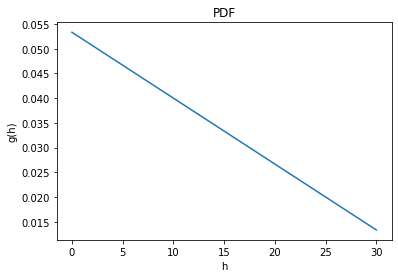

In [27]:
plt.plot(h,g)
plt.ylabel("g(h)")
plt.xlabel("h")
plt.title("PDF")

c) cdf:  
$G(h) = \int_a^{b} g(h)\,dh = \frac{1}{750}\int_a^{b} (40-h)\,dh = \frac{1}{750}(40h - h^{2}/2) | _{h=a}^{h=b} $

In [28]:

G = 1/750*(40*h - h**2/2)

Text(0.5, 1.0, 'CDF')

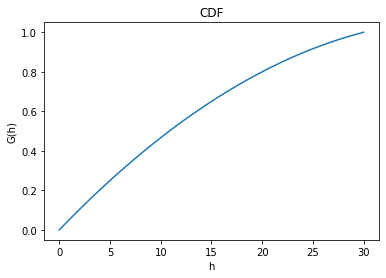

In [29]:
plt.plot(h,G)
plt.ylabel("G(h)")
plt.xlabel("h")
plt.title("CDF")

d)

In [30]:
bottom_third = 30/3
bottom_third_prob = 1/750*(40*bottom_third - bottom_third**2/2)
bottom_third_prob

0.4666666666666667

## Problem 4

a)   
$\mu_X = a\mu+b=b$  
$Var(X) = a^2 Var(Z)=a^2\$  

b)  
$f(x) = \frac{1}{{\sigma \sqrt {2\pi } }} e^\frac{-( {x - \mu })^2 }{2\sigma ^2 }$  
$F_X(x) = P(X<x) = P(aZ+b<x) = P(Z<\frac{x-b}{a}) = \Phi(\frac{x-b}{a})$  
$f_X(x) = \frac{d}{dx}\Phi(x) = \frac{1}{a}{f(\frac{x-b}{a})} = \frac{1}{a{\sqrt {2\pi } }} e^{-\frac{1}{2}(\frac{x-b}{a})^2}$ 

## Problem 5

a)

In [47]:
from scipy.stats import norm

In [51]:
mu = 280
std = 8.5
std_mult = 5

In [55]:
x = np.linspace(mu-std_mult*std, mu+std_mult*std, 100)
pdf = norm.pdf(x, mu, std)
cdf = norm.cdf(x, mu, std)

Text(0.5, 1.0, 'CDF')

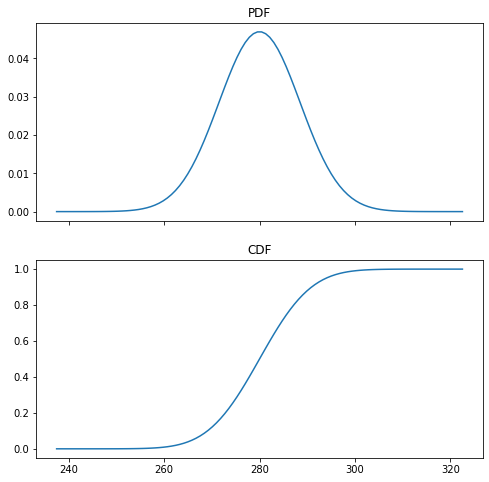

In [61]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,8))
ax[0].plot(x,pdf)
ax[0].set_title("PDF")
ax[1].plot(x,cdf)
ax[1].set_title("CDF")

b)

In [63]:
norm.cdf(mu-7, mu, std)

0.2051034993461297

c)

In [66]:
norm.cdf(mu+6, mu, std) - norm.cdf(mu-7, mu, std)

0.5547658492771589

d)

In [70]:
for i in range(20):
    print(i, norm.cdf(mu-i, mu, std))

0 0.5
1 0.4531736581410965
2 0.40699023020845904
3 0.3620662701944595
4 0.3189674052954785
5 0.27818718521345337
6 0.24013065137671147
7 0.2051034993461297
8 0.1733072162515253
9 0.1448400778673431
10 0.11970343939839467
11 0.09781239343463327
12 0.07900962692369945
13 0.06308119887124095
14 0.049772977802213875
15 0.038806604728851196
16 0.0298940554132321
17 0.022750131948179195
18 0.017102484789337326
19 0.012699022999768246


In [1]:
# exam should be moved 14 days before planned date
25-14

11